IMPORTS

In [1]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

DATASET EXPLORATION

In [2]:
#Dataset
df = pd.read_csv("air quality dataset.csv")

print("Rows : %d"%df.shape[0])
print("Columns : %d"%df.shape[1])

print(df.info())



Rows : 16695
Columns : 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB
None


In [3]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [4]:
#Checking for Nan and duplicate values
print(df.isnull().sum())
df.duplicated().sum()


Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64


0

In [5]:
#Unique values
df["Country"].nunique()

174

DEALING WITH NaN VALUES - FORWARD FILL

In [6]:
df["Country"].fillna(method = "ffill",inplace=True)
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

ENCODING OBJECTS INTO INTEGERS

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Country"] = le.fit_transform(df["Country"])
print(le.classes_)

df.head()

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Côte d'Ivoire" 'Democratic Republic of the Congo' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kingdom of Eswatini' 'Kuwait'
 'Kyrgyzstan' "

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,22,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,22,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,75,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,123,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [8]:
df["City"] = le.fit_transform(df["City"])
print(le.classes_)

df.head()

['Aabenraa' 'Aachen' 'Aalborg' ... 'Zwijndrecht' 'Zwolle' 'Zyryanovsk']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,22,10140,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,22,10140,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,75,10163,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,123,10185,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [9]:
df["CO AQI Category"] = le.fit_transform(df["CO AQI Category"])
print(le.classes_)

df.head()

['Good' 'Moderate' 'Unhealthy for Sensitive Groups']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,Moderate,1,0,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,22,10140,41,Good,1,0,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,22,10140,41,Good,1,0,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,75,10163,66,Moderate,1,0,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,123,10185,34,Good,1,0,34,Good,0,Good,20,Good,53.0167,20.8833


In [10]:
df["Ozone AQI Category"] = le.fit_transform(df["Ozone AQI Category"])
print(le.classes_)

df.head()

['Good' 'Moderate' 'Unhealthy' 'Unhealthy for Sensitive Groups'
 'Very Unhealthy']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,Moderate,1,0,36,0,0,Good,51,Moderate,44.7444,44.2031
1,22,10140,41,Good,1,0,5,0,1,Good,41,Good,-5.2900,-44.4900
2,22,10140,41,Good,1,0,5,0,1,Good,41,Good,-11.2958,-41.9869
3,75,10163,66,Moderate,1,0,39,0,2,Good,66,Moderate,37.1667,15.1833
4,123,10185,34,Good,1,0,34,0,0,Good,20,Good,53.0167,20.8833


In [11]:
df["NO2 AQI Category"] = le.fit_transform(df["NO2 AQI Category"])
print(le.classes_)

df.head()

['Good' 'Moderate']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,Moderate,1,0,36,0,0,0,51,Moderate,44.7444,44.2031
1,22,10140,41,Good,1,0,5,0,1,0,41,Good,-5.2900,-44.4900
2,22,10140,41,Good,1,0,5,0,1,0,41,Good,-11.2958,-41.9869
3,75,10163,66,Moderate,1,0,39,0,2,0,66,Moderate,37.1667,15.1833
4,123,10185,34,Good,1,0,34,0,0,0,20,Good,53.0167,20.8833


In [12]:
df["PM2.5 AQI Category"] = le.fit_transform(df["PM2.5 AQI Category"])
print(le.classes_)

df.head()

['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,Moderate,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,Good,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,22,10140,41,Good,1,0,5,0,1,0,41,0,-11.2958,-41.9869
3,75,10163,66,Moderate,1,0,39,0,2,0,66,2,37.1667,15.1833
4,123,10185,34,Good,1,0,34,0,0,0,20,0,53.0167,20.8833


ANALYSING CORRELATION BETWEEN FEATURES

In [13]:
df.drop('AQI Category',axis = 1).corr()

,Country,City,AQI Value,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
Country,1.000000,0.000572,-0.076668,-0.006988,0.014775,-0.066617,-0.144942,0.243310,-0.008515,-0.069484,-0.020591,0.274160,-0.322893
City,0.000572,1.000000,-0.003822,-0.005455,-0.011016,0.017736,0.008438,0.017702,-0.009722,-0.010802,-0.015228,0.027433,0.055968
AQI Value,-0.076668,-0.003822,1.000000,0.458523,0.137901,0.327956,0.403563,0.308858,0.163978,0.980360,0.691847,-0.099554,0.150662
CO AQI Value,-0.006988,-0.005455,0.458523,1.000000,0.774586,0.039752,0.129976,0.399566,0.513098,0.458846,0.269260,-0.076412,0.002410
CO AQI Category,0.014775,-0.011016,0.137901,0.774586,1.000000,-0.001257,0.015907,0.107060,0.501581,0.136051,0.000753,0.000135,-0.008488
Ozone AQI Value,-0.066617,0.017736,0.327956,0.039752,-0.001257,1.000000,0.815413,-0.251169,-0.029685,0.233031,0.142546,0.249740,0.318965
Ozone AQI Category,-0.144942,0.008438,0.403563,0.129976,0.015907,0.815413,1.000000,-0.065436,-0.006115,0.328718,0.240909,0.015808,0.239689
NO2 AQI Value,0.243310,0.017702,0.308858,0.399566,0.107060,-0.251169,-0.065436,1.000000,0.247692,0.341455,0.357931,0.040666,-0.290813
NO2 AQI Category,-0.008515,-0.009722,0.163978,0.513098,0.501581,-0.029685,-0.006115,0.247692,1.000000,0.165100,0.035850,-0.007744,0.019186
PM2.5 AQI Value,-0.069484,-0.010802,0.980360,0.458846,0.136051,0.233031,0.328718,0.341455,0.165100,1.000000,0.729628,-0.125997,0.113621


<Axes: xlabel='Ozone AQI Value'>

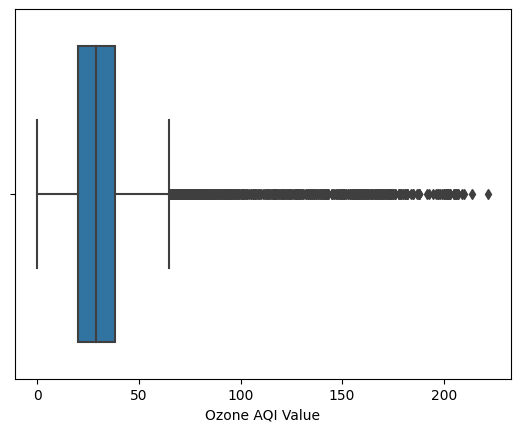

In [14]:
sns.boxplot(x="Ozone AQI Value",data=df)

FIXING FEATURES AND CHOOSING ALGORITHM

In [15]:
#Train and Target columns
x=df.drop(['AQI Category','lat','lng','AQI Value','Country','City'],axis=1)
y=df['AQI Value']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [16]:
print(x)

       CO AQI Value  CO AQI Category  Ozone AQI Value  Ozone AQI Category   
0                 1                0               36                   0  \
1                 1                0                5                   0   
2                 1                0                5                   0   
3                 1                0               39                   0   
4                 1                0               34                   0   
...             ...              ...              ...                 ...   
16690             1                0               34                   0   
16691             1                0               39                   0   
16692             1                0               39                   0   
16693             1                0               20                   0   
16694             1                0               44                   0   

       NO2 AQI Value  NO2 AQI Category  PM2.5 AQI Value  PM2.5 AQI Category

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred_reg = reg.predict(x_test)

print("Training Accuracy :",reg.score(x_train,y_train))
print("Testing Accuracy :",reg.score(x_test,y_test))

print("Prediction accuracy : ",metrics.r2_score(y_test,y_pred_reg))


Training Accuracy : 0.9729714614341439
Testing Accuracy : 0.9727915517240571
Prediction accuracy :  0.9727915517240571


PERFORMING VISUALIZATION TO FIND RANGE OF QUALITY

[Text(0.5, 1.0, 'Scattered plot chart')]

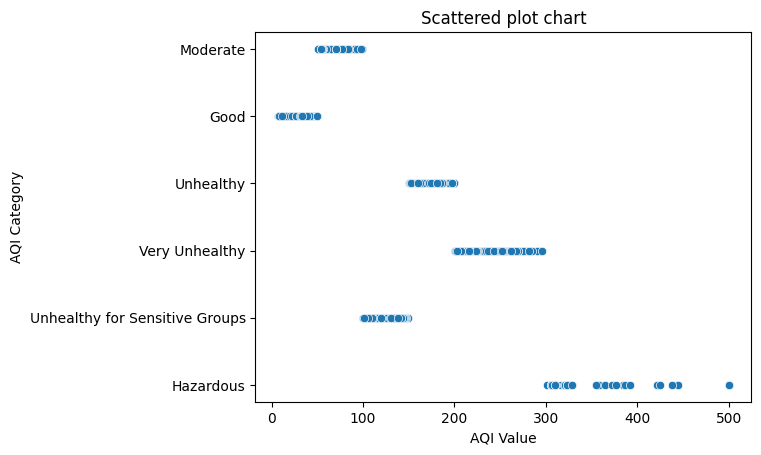

In [19]:
quality = ['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']

sns.scatterplot(x='AQI Value' , y='AQI Category',data = df).set(title = "Scattered plot chart")

USER PREDICTION - AQI VALUE

In [20]:
AQI = reg.predict([[1,0,36,0,0,0,51,2]])
print(AQI)

[53.47882276]


C:\Users\Saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


AIR QUALITY FROM AQI VALUE

In [21]:
def status(AQI_value):
    if AQI_value <= 50:
        return "Good"
    elif AQI_value <= 100:
        return "Moderate"
    elif AQI_value <= 150:
        return "Unhealthy for Sensitive Groups"   
    elif AQI_value <= 200:
        return "Unhealthy"
    elif AQI_value <= 300:
        return "Very Unhealthy"
    elif AQI_value > 300:
        return "Hazardous" 

print("Air Quality :",status(AQI))

Air Quality : Moderate


PICKLE FILE FORMAT

In [22]:
import pickle

In [23]:
with open("pickle_model.pickle",'wb') as f:
    pickle.dump(reg,f)

In [24]:
with open("pickle_model.pickle",'rb') as f:
    model = pickle.load(f)

In [25]:
AQI = model.predict([[1,0,36,0,0,0,51,2]])


C:\Users\Saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print("Air Quality :",status(AQI))

Air Quality : Moderate
